# **Análise Estatística: Regressão Multivariada**

Neste exercício vamos fazer uma análise de regressão multivariada com a base de dados autos.csv para tentar prever o preço de carro a partir das seguintes variáveis: potência (horsepower), comprimento (length), tamanho do motor (engine.size), consumo na cidade (city.mpg).

In [ ]:
install.packages("GGally")
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **Pacotes utilizados:**

In [ ]:
library(GGally)
library(ggplot2)
library(MASS)
library(dplyr)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
autos <- read.csv('/content/autos.csv', sep = ';', dec = ',')

### **Análise exploratória:**

In [ ]:
autos2 <- autos[, c('price', 'horsepower', 'length', 'engine.size', 'city.mpg')]

head(autos2) # Começo dos dados

,price,horsepower,length,engine.size,city.mpg
,<int>,<int>,<dbl>,<int>,<int>
1,13495,111,168.8,130,21
2,16500,111,168.8,130,21
3,16500,154,171.2,152,19
4,13950,102,176.6,109,24
5,17450,115,176.6,136,18
6,15250,110,177.3,136,19


In [ ]:
tail(autos2) # Final dos dados

,price,horsepower,length,engine.size,city.mpg
,<int>,<int>,<dbl>,<int>,<int>
188,18950,162,188.8,130,17
189,16845,114,188.8,141,23
190,19045,160,188.8,141,19
191,21485,134,188.8,173,18
192,22470,106,188.8,145,26
193,22625,114,188.8,141,19


In [ ]:
summary(autos2) # Sumário dos dados

     price         horsepower        length       engine.size   
 Min.   : 5118   Min.   : 48.0   Min.   :141.1   Min.   : 61.0  
 1st Qu.: 7738   1st Qu.: 70.0   1st Qu.:166.3   1st Qu.: 98.0  
 Median :10245   Median : 95.0   Median :173.2   Median :120.0  
 Mean   :13285   Mean   :103.5   Mean   :174.3   Mean   :128.1  
 3rd Qu.:16515   3rd Qu.:116.0   3rd Qu.:184.6   3rd Qu.:146.0  
 Max.   :45400   Max.   :262.0   Max.   :208.1   Max.   :326.0  
    city.mpg    
 Min.   :13.00  
 1st Qu.:19.00  
 Median :25.00  
 Mean   :25.33  
 3rd Qu.:30.00  
 Max.   :49.00  

In [ ]:
dim(autos2) # Dimensão dos dados

[1] 193   5

In [ ]:
str(autos2) # Estrutura dos dados

'data.frame':	193 obs. of  5 variables:
 $ price      : int  13495 16500 16500 13950 17450 15250 17710 18920 23875 16430 ...
 $ horsepower : int  111 111 154 102 115 110 110 110 140 101 ...
 $ length     : num  169 169 171 177 177 ...
 $ engine.size: int  130 130 152 109 136 136 136 136 131 108 ...
 $ city.mpg   : int  21 21 19 24 18 19 19 19 17 23 ...


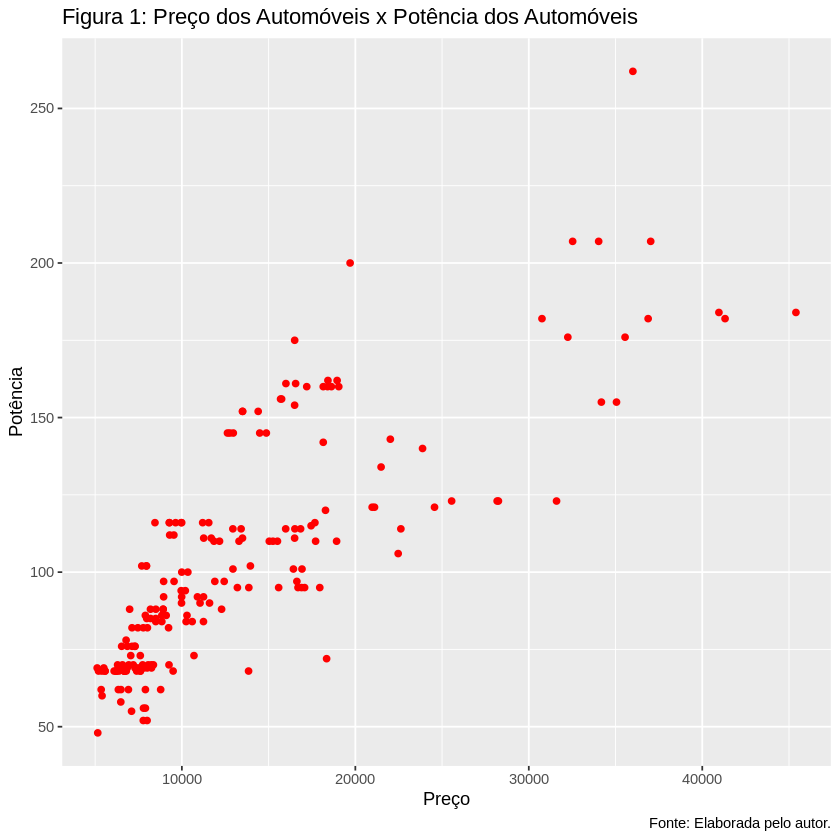

In [ ]:
ggplot(autos2) +
  geom_point(aes(price, horsepower), color = 'red') +
  labs(title = 'Figura 1: Preço dos Automóveis x Potência dos Automóveis', x = 'Preço', y = 'Potência', caption = 'Fonte: Elaborada pelo autor.')

Na Figura 1, vemos que, conforme a potência do automóvel aumenta, o seu preço também aumenta.

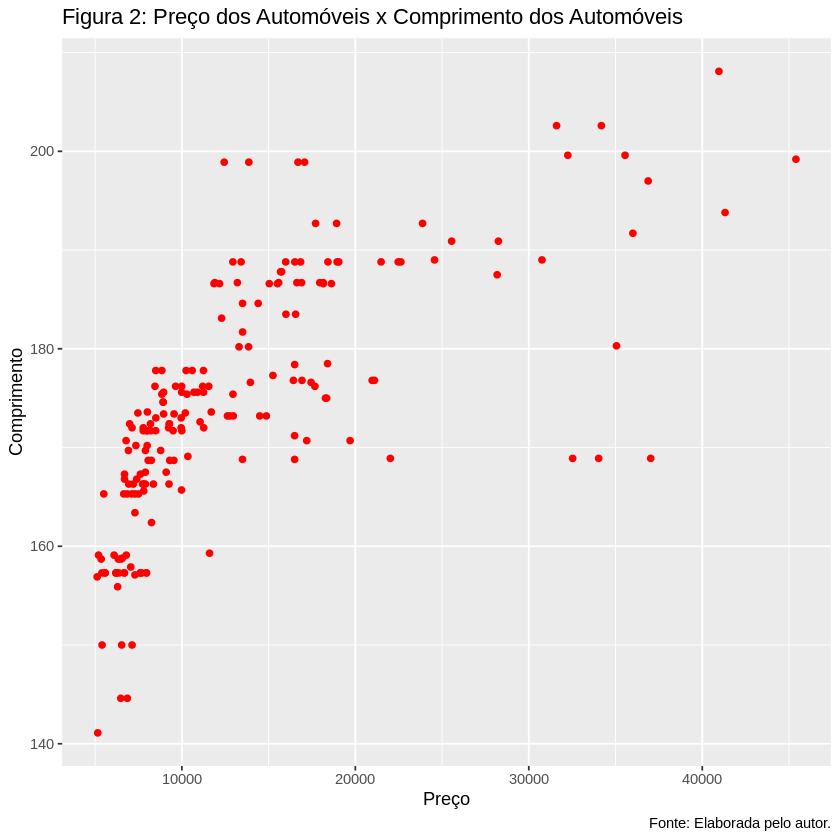

In [ ]:
ggplot(autos2) +
  geom_point(aes(price, length), color = 'red') +
  labs(title = 'Figura 2: Preço dos Automóveis x Comprimento dos Automóveis', x = 'Preço', y = 'Comprimento', caption = 'Fonte: Elaborada pelo autor.')

Assim como na Figura 1, a Figura 2 apresenta o mesmo padrão de aumento: quanto maior o comprimento do automóvel, maior será o preço, porém os dados apresentam uma distribuição diferente, não linear, com maior concentração no valor da variável Preço em até 20000.

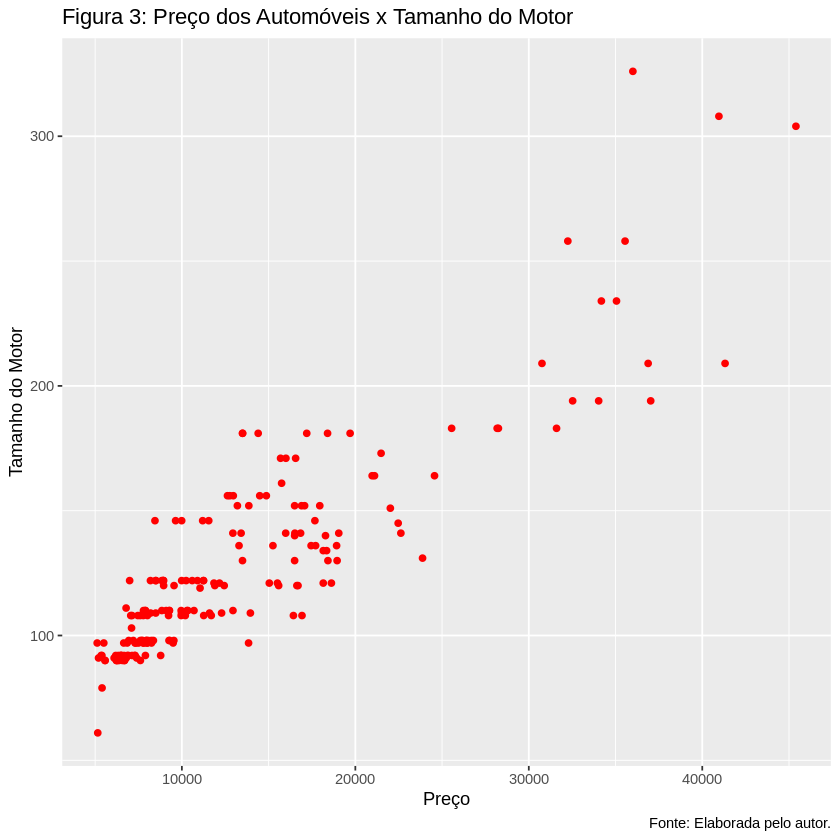

In [ ]:
ggplot(autos2) +
  geom_point(aes(price, engine.size), color = 'red') +
  labs(title = 'Figura 3: Preço dos Automóveis x Tamanho do Motor', x = 'Preço', y = 'Tamanho do Motor', caption = 'Fonte: Elaborada pelo autor.')

O gráfico de dispersão apresentado na Figura 3, mostra uma forte relação crescente aproximadamente linear entre o preço e o tamanho do motor.

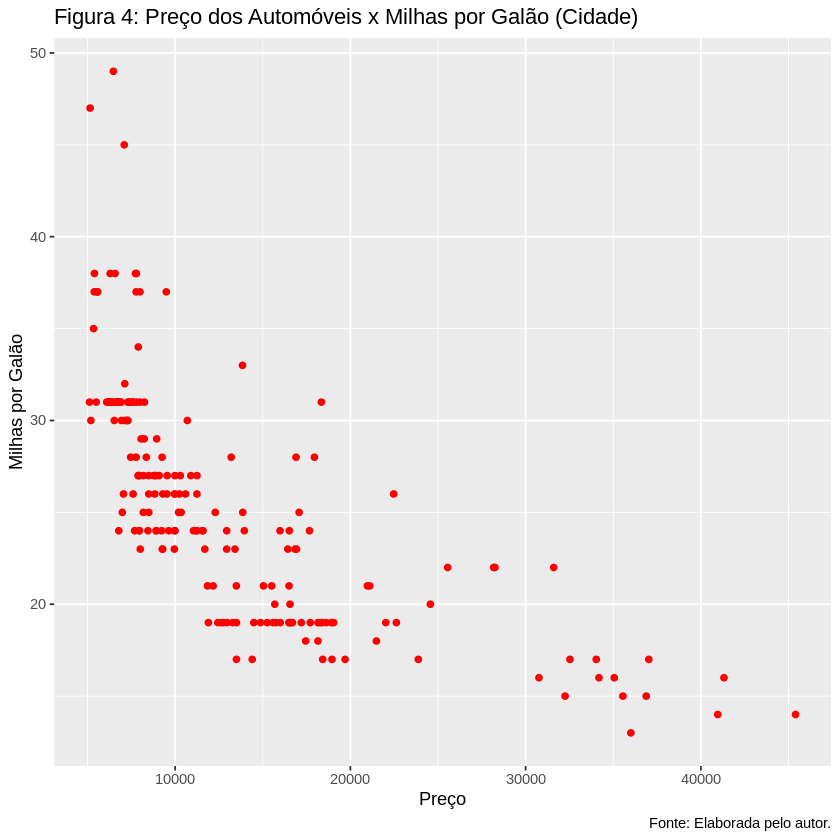

In [ ]:
ggplot(autos2) +
  geom_point(aes(price, city.mpg), color = 'red') +
  labs(title = 'Figura 4: Preço dos Automóveis x Milhas por Galão (Cidade)', x = 'Preço', y = 'Milhas por Galão', caption = 'Fonte: Elaborada pelo autor.')

No gráfico da Figura 4, vemos uma distribuição decrescente onde, quanto maior o preço do automóvel, menor é o seu consumo dentro da cidade.

In [ ]:
cor(autos2) # Correlação dos dados

,price,horsepower,length,engine.size,city.mpg
price,1.0000000,0.8124532,0.6959279,0.8887785,-0.7066180
horsepower,0.8124532,1.0000000,0.5896502,0.8453249,-0.8336154
length,0.6959279,0.5896502,1.0000000,0.6869976,-0.7021426
engine.size,0.8887785,0.8453249,0.6869976,1.0000000,-0.7163780
city.mpg,-0.7066180,-0.8336154,-0.7021426,-0.7163780,1.0000000


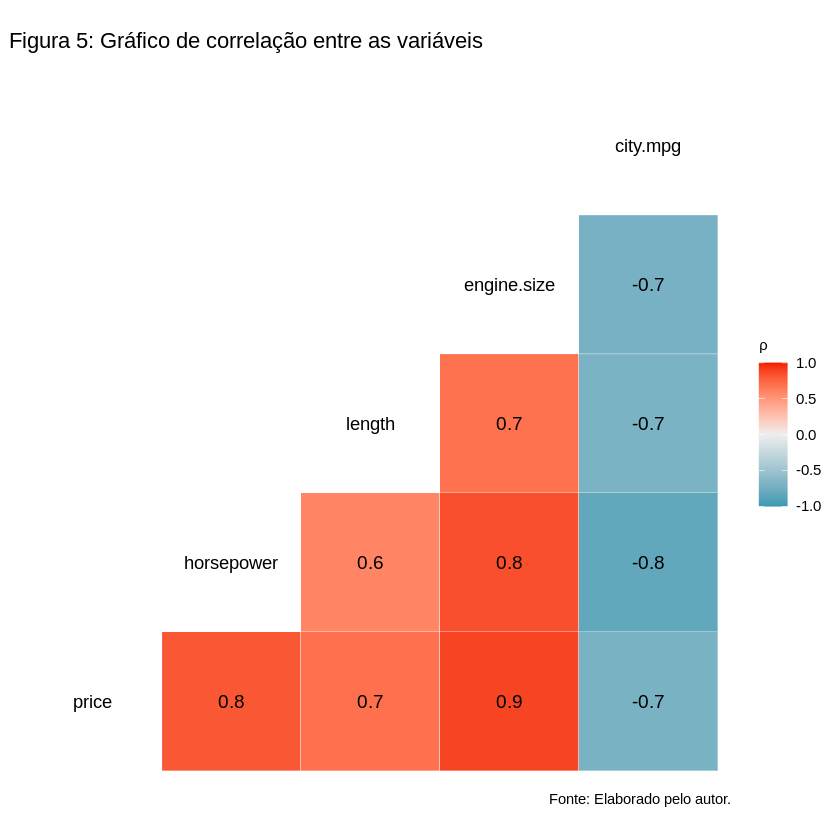

In [ ]:
ggcorr(autos2, palette = 'RdYlGn', name = bquote(rho), label = T, label_color = 'black') +
  labs(title = 'Figura 5: Gráfico de correlação entre as variáveis',caption = 'Fonte: Elaborado pelo autor.')

Observe que o gráfico de correlação (Figura 5) entre as variáveis que estamos trabalhando, confirma a informação vista na Figura 4, onde a variável que menos tem impacto nas demais variáveis é o consumo dos automóveis na cidade (city.mpg).

### **Ajustando um modelo de regressão linear ao dados:**

In [ ]:
modelo <- lm(price ~ horsepower + length + engine.size + city.mpg, data = autos2)

summary(modelo)


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg, 
    data = autos2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9697.0 -1745.7    24.9  1389.4 12904.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28480.00    7114.51  -4.003 8.99e-05 ***
horsepower      52.74      16.62   3.174 0.001756 ** 
length         114.58      32.30   3.548 0.000491 ***
engine.size    115.32      12.92   8.922 4.06e-16 ***
city.mpg        61.51      83.05   0.741 0.459849    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3499 on 188 degrees of freedom
Multiple R-squared:  0.8168,	Adjusted R-squared:  0.8129 
F-statistic: 209.5 on 4 and 188 DF,  p-value: < 2.2e-16


Os parâmetros horsepower, length e engine.size possuem um P-value menor que 5%, indicando a escolha da hipótese alternativa, onde a potência do motor, o comprimento e o tamanho do motor está ligado ao aumento do preço dos automóveis. Por outro lado, o parâmetro city.mpg não apresenta significância estatística podendo, assim, ser removido do modelo.

In [ ]:
modelo2 <- lm(price ~ . - city.mpg, autos2) # Removendo o parâmetro city.mpg do modelo

summary(modelo2)


Call:
lm(formula = price ~ . - city.mpg, data = autos2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9351.8 -1808.5    87.3  1351.9 13043.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24227.12    4195.20  -5.775 3.12e-08 ***
horsepower      44.60      12.44   3.585 0.000429 ***
length         102.48      27.83   3.683 0.000301 ***
engine.size    117.33      12.62   9.296  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3495 on 189 degrees of freedom
Multiple R-squared:  0.8162,	Adjusted R-squared:  0.8133 
F-statistic: 279.8 on 3 and 189 DF,  p-value: < 2.2e-16


Após a atualização do modelo, vemos que não houve uma mudança significativa nos valores R-quadrado e R-quadrado ajustado, ambos indicando que o modelo explica aproximadamente 81% dos dados, o mesmo percentual apresentado no modelo anterior.

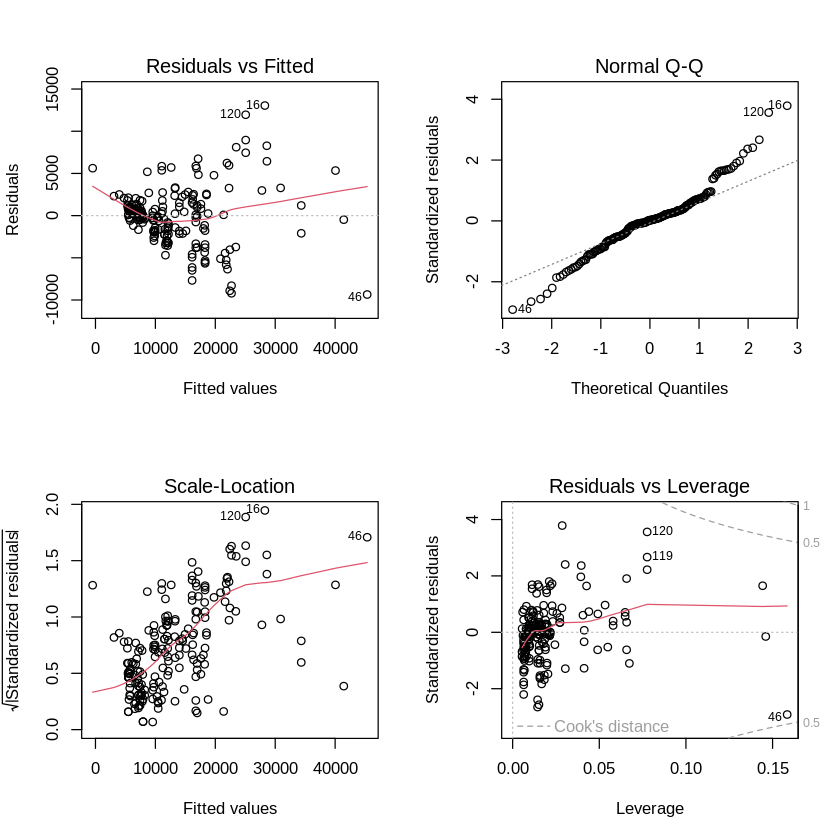

In [ ]:
par(mfrow = c(2,2))
plot(modelo2)

O modelo atual não atende as premissas estatísticas do método dos mínimos quadrados ordinários - OLS. Os resíduos do modelo não tem um comportamento próximo do que se espera, isto é, há uma ocilação na solução apresentada e, de acordo com a dispersão desses resíduos, indica não ser uma regressão linear. Já o gráfico Normal Q-Q não segue uma distribuição normal dentro do que seria aceitável. Há uma discrepância na área superior e inferior do gráfico, sendo necessário a aplicação de alguma técnica matemática para normalizar os dados.

### **Transformação da Variável Resposta:**

**Teste de Normalidade de Shapiro-Wilk:** 

In [ ]:
shapiro.test(residuals(modelo2))


	Shapiro-Wilk normality test

data:  residuals(modelo2)
W = 0.9625, p-value = 5.149e-05


Observamos, pelo Teste de Normalidade de Shapiro-Wilk, que a hipótese nula deve ser rejeitada, já que obtivemos um p-value de 5.149e-05

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


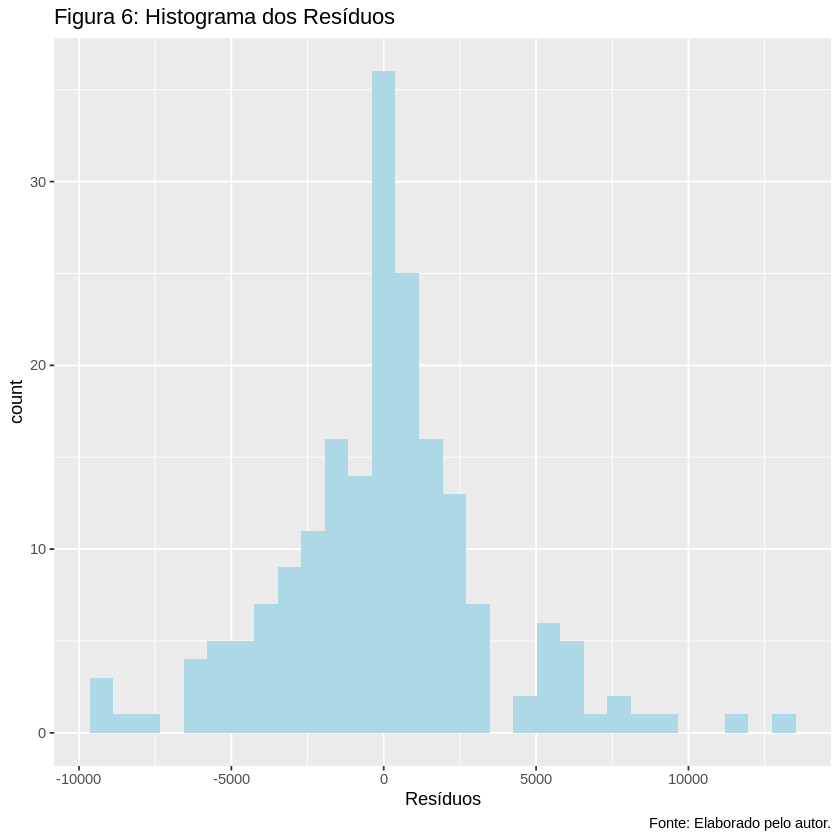

In [ ]:
df_residuos <- data.frame(Residuos = residuals(modelo2), 
                          Ajustados = fitted(modelo2))

ggplot(df_residuos) +
  geom_histogram(aes(Residuos), fill = 'lightblue') +
  labs(title = 'Figura 6: Histograma dos Resíduos', x = 'Resíduos', caption = 'Fonte: Elaborado pelo autor.')

Na Figura 6, observamos que os resíduos aparentam ter uma distribuição multimodal.

**Técnica matemática Box-Cox:**

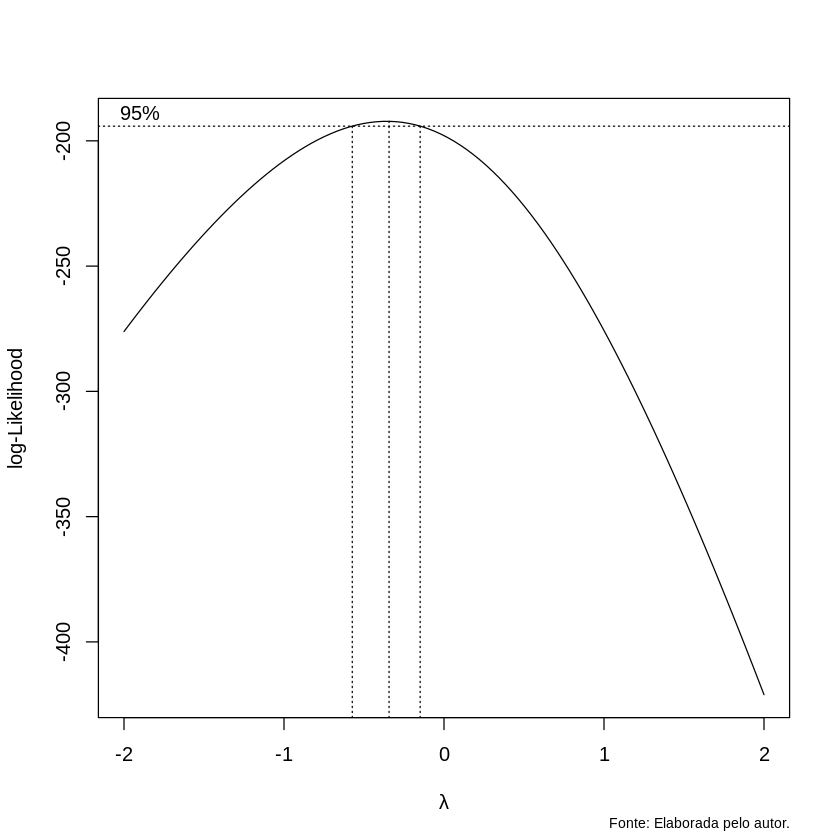

In [ ]:
par(mfrow = c(1,1))
boxcox(modelo2, data = autos2, eps = 0.001)
mtext('Fonte: Elaborada pelo autor.', xpd = NA, cex = 0.7, side = 1, line = 3.8, adj = 1)

In [ ]:
bx <- boxcox(modelo2, data = autos2, eps = 0.001, plotit = F)

bx_df <- data.frame(x = bx$x, y = bx$y)

bx_df2 <- bx_df[with(bx_df, order(-bx_df$y)),]

bx_df2[1,]

,x,y
,<dbl>,<dbl>
17,-0.4,-192.2751


Pelo gráfico feito através do Box-Cox, verificamos que o intervalo de confiança é de 95% com valor de lambda = -0.4.

In [ ]:
lambda <- round(bx_df2[1,"x"],3)

resposta_transf <- mutate(autos2, price_transf = (price^lambda - 1) / lambda) # Inserindo a nova variável 

In [ ]:
modelo3 <- lm(price_transf ~ horsepower + length + engine.size, data = resposta_transf) # Ajustando os dados a um novo modelo

summary(modelo3)


Call:
lm(formula = price_transf ~ horsepower + length + engine.size, 
    data = resposta_transf)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0136624 -0.0029606 -0.0001835  0.0023942  0.0150266 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.348e+00  5.613e-03 418.404  < 2e-16 ***
horsepower  1.355e-04  1.665e-05   8.140 5.21e-14 ***
length      4.118e-04  3.723e-05  11.062  < 2e-16 ***
engine.size 4.017e-05  1.689e-05   2.379   0.0183 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004676 on 189 degrees of freedom
Multiple R-squared:  0.8402,	Adjusted R-squared:  0.8376 
F-statistic: 331.1 on 3 and 189 DF,  p-value: < 2.2e-16


Examinando o sumário do novo modelo ajustado após a transformação da variável resposta, nota-se um aumento no valor do R-quadrado de 81% para 83%.

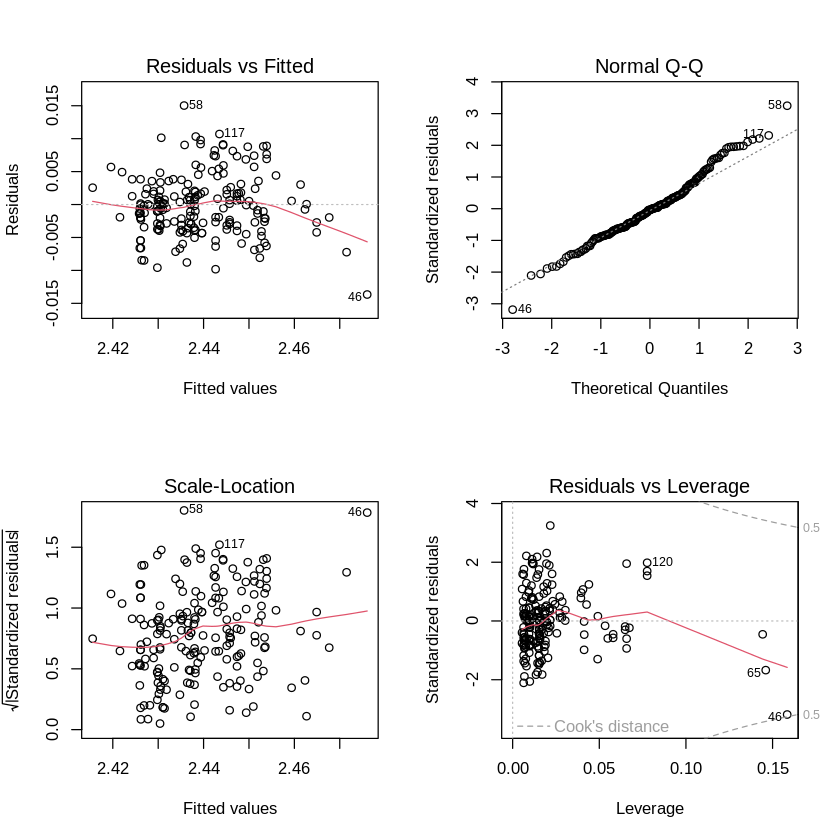

In [ ]:
par(mfrow = c(2,2))
plot(modelo3)

Avaliando os gráficos diagnósticos, vemos uma melhora nas distribuições dos resíduos, apresentando serem aleatórios e mais próximos de uma normalidade.

**Teste de Normalidade de Shapiro-Wilk:**

In [ ]:
shapiro.test(residuals(modelo3))


	Shapiro-Wilk normality test

data:  residuals(modelo3)
W = 0.98588, p-value = 0.05054


De acordo com o teste de Shapiro-Wilk o p-value cai na região de aceitação da hipótese nula, indicando que a transformação surtiu efeito.

### **Transformação da Variável Explicativa:**

In [ ]:
# Realizando a transformação aplicando a função raiz quadrada e gerando novas colunas
explica_transf <- mutate(resposta_transf, 
                         horsepower_transf = sqrt(horsepower), 
                         length_transf = sqrt(length),
                         engine.size_transf = sqrt(engine.size))

In [ ]:
modelo4 <- lm(price_transf ~ horsepower_transf + length_transf + engine.size_transf, explica_transf)

summary(modelo4)


Call:
lm(formula = price_transf ~ horsepower_transf + length_transf + 
    engine.size_transf, data = explica_transf)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0108002 -0.0031884 -0.0001675  0.0023836  0.0144535 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.2693467  0.0111450 203.621  < 2e-16 ***
horsepower_transf  0.0026746  0.0003601   7.427  3.7e-12 ***
length_transf      0.0095234  0.0009994   9.529  < 2e-16 ***
engine.size_transf 0.0015772  0.0004298   3.669 0.000316 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004566 on 189 degrees of freedom
Multiple R-squared:  0.8476,	Adjusted R-squared:  0.8452 
F-statistic: 350.5 on 3 and 189 DF,  p-value: < 2.2e-16


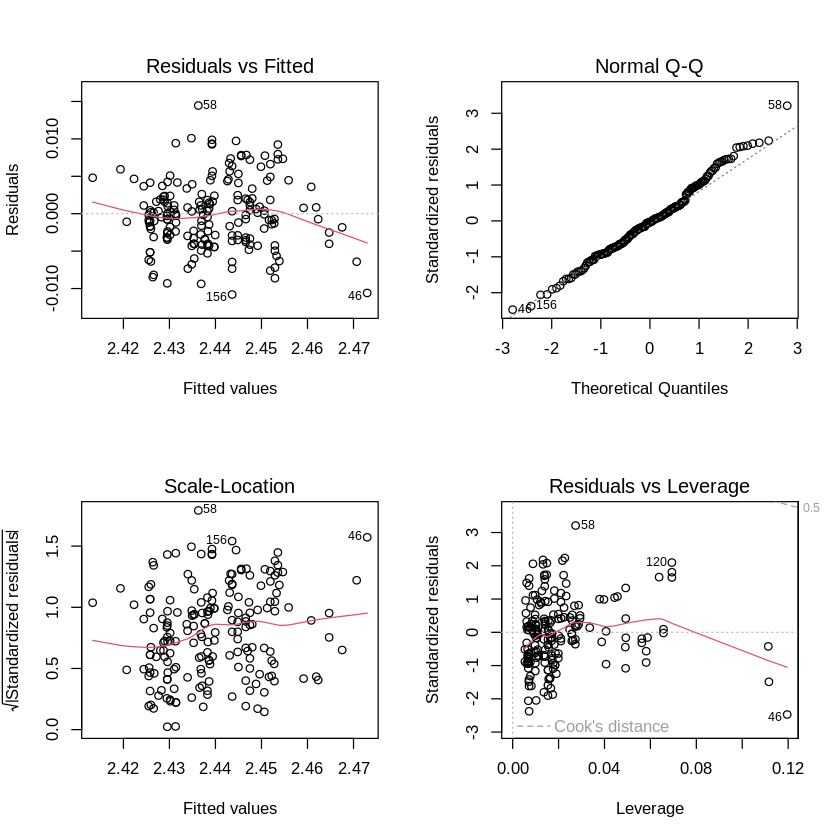

In [ ]:
par(mfrow = c(2,2))
plot(modelo4)

**Teste de Normalidade de Shapiro-Wilk:**

In [ ]:
shapiro.test(residuals(modelo4))


	Shapiro-Wilk normality test

data:  residuals(modelo4)
W = 0.99049, p-value = 0.2323


O modelo final ajustado aos dados após a transformação das variáveis explicativas, apresentam resíduos em simetria, com R-quadrado ajustado de 84% (maior que os últimos três modelos anteriores). A análise dos resíduos mostrados nos gráficos diagnósticos, indica a aleatoriedade dos resíduos e um ajuste mais próximo da normalidade que o modelo anterior, assim como o Teste de Normalidade de Shapiro-Wilk, cujo P-value é 0.2323.

### **Avaliando a habilidade preditora do modelo final:**

In [ ]:
# Mantendo as colunas necessárias
autos3 <- subset(explica_transf, select = c(price_transf, horsepower_transf, length_transf, engine.size_transf))

set.seed(3845)

# Separando os dados em dados de treino e teste
treino <- sample_frac(autos3, 0.7)
sid <- as.numeric(rownames(treino))
teste <- autos3[-sid,]

In [ ]:
fit <- predict(modelo4, newdata = teste, type = 'response')

diferenca <- fit - teste$price_transf

(rmse <- sqrt(mean(diferenca^2)))

[1] 0.004123754

Vemos um exelente resultado de teste de predição do nosso modelo estando muito próximo a zero.

### **Conclusão:**

O modelo linear final apresentado, sugere que um aumento de 1% no preço do automóvel está associado com um aumento de 0.0026746 de sua potência, 0.0095234 de aumento de seu comprimento e 0.0015772 de aumento do tamanho de seu motor.

Em conjunto, as variáveis preditoras respondem por 84% da variância no preço do automóvel, sendo este o mesmo percentual adquirido pelo valor do R-quadrado ajustado.

### **Bibliografia:**

- Dua, D. e Graff, C. (2019). **Repositório de aprendizado de máquina da [UCI](http://archive.ics.uci.edu/ml)**. Irvine, CA: Universidade da Califórnia, Escola de Informação e Ciência da Computação.